In [60]:
import tensorflow as tf
from tensorflow import keras
from keras import callbacks

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
df.isna().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [64]:
X = df.drop("charges", axis=1)
y= df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=7)

In [65]:
transformer = make_column_transformer((StandardScaler(), ["age","bmi","children"]),
                                      (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"]))  #implementing column transformer for preprocessing

In [66]:
X_train_norm = transformer.fit_transform(X_train)  #fit transform ONLY on training data
X_test_norm = transformer.transform(X_test)

In [67]:
X_train

,age,sex,bmi,children,smoker,region
1317,18,male,53.130,0,no,southeast
794,39,female,31.920,2,no,northwest
680,21,female,17.400,1,no,southwest
795,27,male,28.500,0,yes,northwest
887,36,female,30.020,0,no,northwest
...,...,...,...,...,...,...
211,40,male,30.875,4,no,northwest
502,51,male,23.210,1,yes,southeast
537,46,female,30.200,2,no,southwest
1220,30,female,21.945,1,no,northeast


In [68]:
X_train_norm  # checking changes

array([[-1.47643983e+00,  3.67390113e+00, -9.06436014e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.24949253e-03,  2.13575580e-01,  7.47249467e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.26534135e+00, -2.15530358e+00, -7.95932732e-02, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 4.93812599e-01, -6.70354501e-02,  7.47249467e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-6.32045930e-01, -1.41380525e+00, -7.95932732e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.69003729e+00,  1.15655916e+00, -9.06436014e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [69]:
model = tf.keras.Sequential([keras.layers.Dense(150, activation="relu"),
                             keras.layers.Dense(100, activation="relu"),
                             keras.layers.Dense(50, activation="relu"),
                             keras.layers.Dense(1, activation="relu")])

model.compile(loss=keras.losses.mae,
              optimizer = keras.optimizers.Adam(),
              metrics= ["mae"])

In [70]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001,
                                        patience = 30,
                                        restore_best_weights = True)

In [71]:
history = model.fit(X_train_norm, y_train, 
                    validation_split=0.1,
                    epochs=500, 
                    verbose=0, 
                    callbacks=[early_stopping])

In [72]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,mae,val_loss,val_mae
0,13250.967773,13250.967773,12623.010742,12623.010742
1,13203.964844,13203.964844,12498.893555,12498.893555
2,12881.050781,12881.050781,11818.420898,11818.420898
3,11598.847656,11598.847656,9794.647461,9794.647461
4,9137.148438,9137.148438,7482.038574,7482.038574
...,...,...,...,...
495,1416.387939,1416.387939,801.260315,801.260315
496,1412.391357,1412.391357,834.160034,834.160034
497,1439.288330,1439.288330,791.915894,791.915894
498,1418.477539,1418.477539,826.340820,826.340820


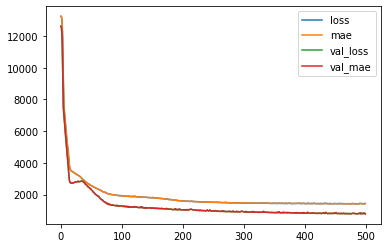

In [73]:
hist_df.plot();

In [74]:
model.evaluate(X_test_norm, y_test) 

9/9 [==============================] - 0s 1ms/step - loss: 1604.8816 - mae: 1604.8816


[1604.881591796875, 1604.881591796875]

In [75]:
y_pred = model.predict(X_test_norm)
mean_absolute_error(y_test, y_pred)  # MAE

9/9 [==============================] - 0s 881us/step


1604.8816705793786

In [76]:
mean_squared_error(y_test, y_pred, squared=False) # Checking ROOT MSE

4851.0168822755595